# 📊 Admissions Data Exploration
### Understanding the dataset before cleaning
This notebook loads and explores the raw admissions dataset (`admission_data.csv`).  
We'll analyze missing values, data types, and key statistics.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization style
sns.set(style="whitegrid")

In [3]:
# Load the dataset
file_path = "../data/processed/admission_data_cleaned.csv" 
df = pd.read_csv(file_path)

In [4]:
# Show first 5 rows
df.head()

,Applicant_ID,Age,Gender,Program_Applied,GPA,SAT_Score,Acceptance_Status,Scholarship_Status,Enrollment_Status,GPA_Normalized,SAT_Score_Normalized
0,1024,17.0,Male,Engineering,2.62,1138.0,Rejected,Yes,Not Enrolled,0.310,0.337159
1,1245,19.0,Male,Healthcare,3.39,1153.0,Rejected,Yes,Enrolled,0.695,0.358680
2,1248,25.0,Male,Computer Science,2.27,1058.0,Rejected,Yes,Enrolled,0.135,0.222382
3,1167,19.0,Male,Healthcare,2.63,1449.0,Accepted,Yes,Not Enrolled,0.315,0.783357
4,1424,23.0,Male,Business,3.02,1455.0,Rejected,No,Not Enrolled,0.510,0.791966


In [5]:
# Get info about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          645 non-null    int64  
 1   Age                   645 non-null    float64
 2   Gender                645 non-null    object 
 3   Program_Applied       645 non-null    object 
 4   GPA                   645 non-null    float64
 5   SAT_Score             645 non-null    float64
 6   Acceptance_Status     645 non-null    object 
 7   Scholarship_Status    645 non-null    object 
 8   Enrollment_Status     645 non-null    object 
 9   GPA_Normalized        645 non-null    float64
 10  SAT_Score_Normalized  645 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 55.6+ KB


In [6]:
# Count missing values per column
df.isnull().sum()

Applicant_ID            0
Age                     0
Gender                  0
Program_Applied         0
GPA                     0
SAT_Score               0
Acceptance_Status       0
Scholarship_Status      0
Enrollment_Status       0
GPA_Normalized          0
SAT_Score_Normalized    0
dtype: int64

In [7]:
# Show summary statistics for numerical columns
df.describe()

,Applicant_ID,Age,GPA,SAT_Score,GPA_Normalized,SAT_Score_Normalized
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1247.182946,23.249612,2.993350,1257.066667,0.496675,0.507987
std,143.800243,3.876352,0.544429,195.976485,0.272215,0.281171
min,1001.000000,17.000000,2.000000,903.000000,0.000000,0.000000
25%,1123.000000,20.000000,2.580000,1106.000000,0.290000,0.291248
50%,1246.000000,23.000000,2.989000,1262.000000,0.494500,0.515065
75%,1371.000000,27.000000,3.410000,1422.000000,0.705000,0.744620
max,1500.000000,30.000000,4.000000,1600.000000,1.000000,1.000000


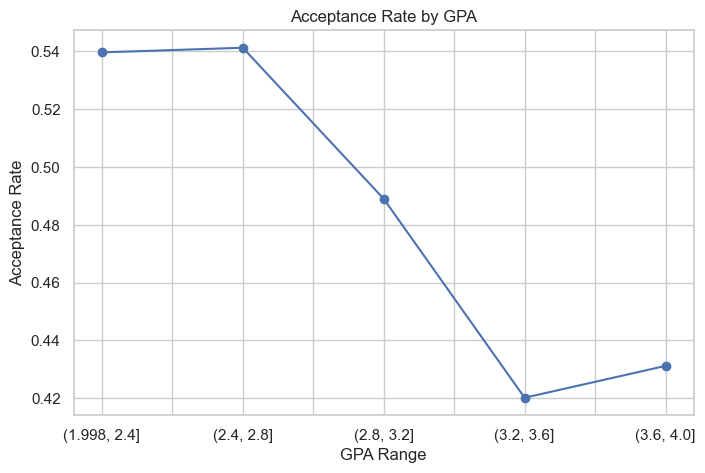

In [8]:
#Acceptance Rate by GPA (Line Chart)
df["GPA_Binned"] = pd.cut(df["GPA"], bins=5)
acceptance_rates = df.groupby("GPA_Binned", observed=False)["Acceptance_Status"].apply(lambda x: (x == "Accepted").mean())

plt.figure(figsize=(8, 5))
acceptance_rates.plot(kind='line', marker='o', color='b')
plt.title("Acceptance Rate by GPA")
plt.xlabel("GPA Range")
plt.ylabel("Acceptance Rate")
plt.show()

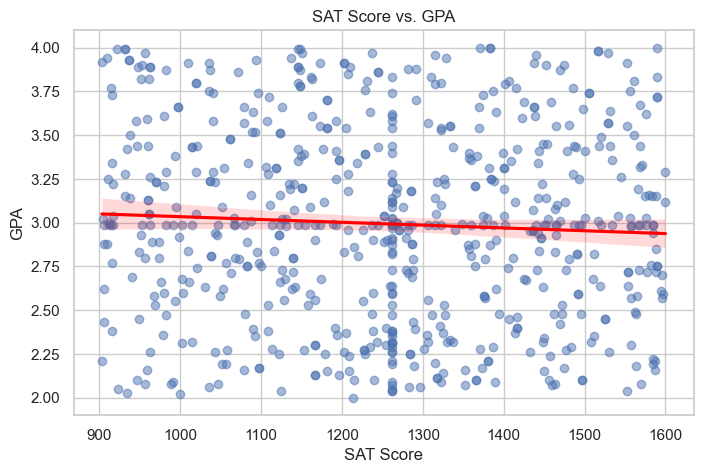

In [9]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df["SAT_Score"], y=df["GPA"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("SAT Score vs. GPA")
plt.xlabel("SAT Score")
plt.ylabel("GPA")
plt.show()

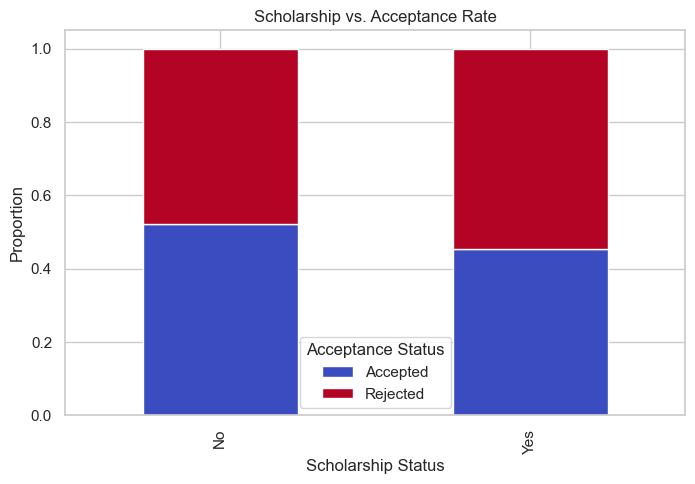

In [10]:
#Scholarship vs. Acceptance Rate (Stacked Bar Chart)
scholarship_acceptance = df.groupby("Scholarship_Status")["Acceptance_Status"].value_counts(normalize=True).unstack()

scholarship_acceptance.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")
plt.title("Scholarship vs. Acceptance Rate")
plt.xlabel("Scholarship Status")
plt.ylabel("Proportion")
plt.legend(title="Acceptance Status")
plt.show()


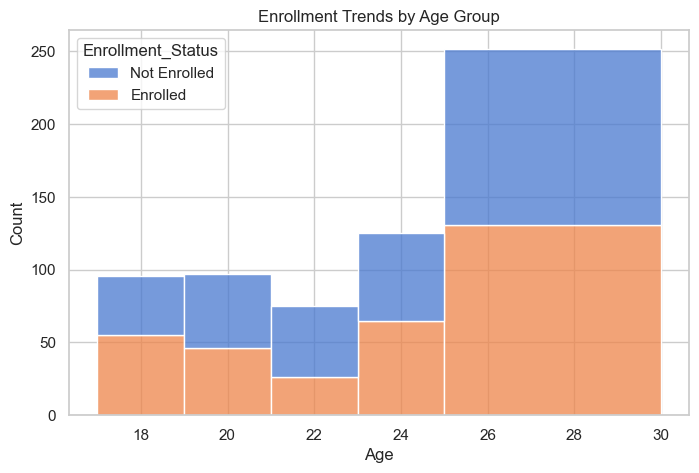

In [11]:
#Enrollment Trends by Age Group (Histogram)
age_bins = [17, 19, 21, 23, 25, 30]
plt.figure(figsize=(8, 5))
sns.histplot(df, x="Age", bins=age_bins, hue="Enrollment_Status", multiple="stack", palette="muted")
plt.title("Enrollment Trends by Age Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

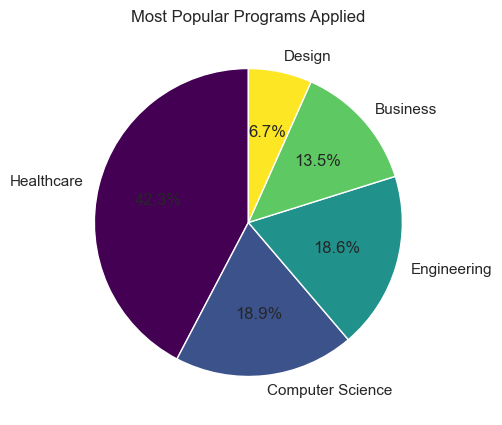

In [12]:
# Most Popular Programs Applied (Pie Chart)
plt.figure(figsize=(8, 5))
df["Program_Applied"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis", startangle=90)
plt.title("Most Popular Programs Applied")
plt.ylabel("")
plt.show()

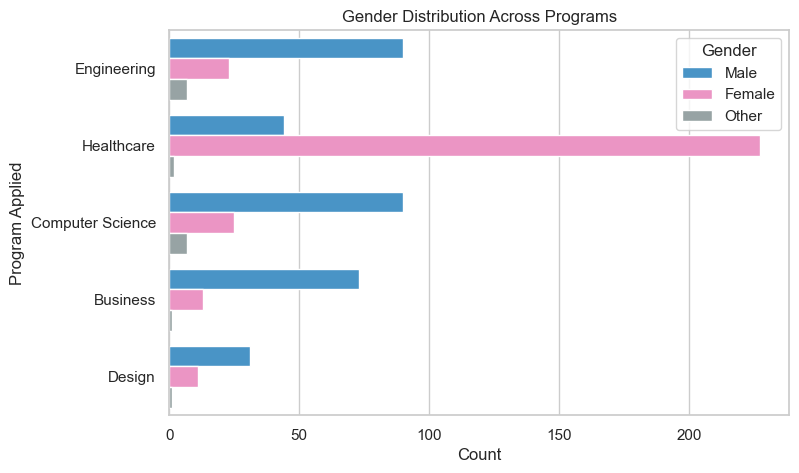

In [13]:
# Male & Female Distribution Across Programs (Bar Chart)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="Program_Applied", hue="Gender", palette=["#3498db","#f987c5","#95a5a6"])
plt.title("Gender Distribution Across Programs")
plt.xlabel("Count")
plt.ylabel("Program Applied")
plt.legend(title="Gender")
plt.show()
